# Narrative Analysis
In the Williamstown police department data, there are frequently "Narrative" fields associated with each incident. We have several overarching questions regarding these narratives, which include:
* Is there evidence of the "boys will be boys" culture instilled in the department by the previous police chief in the descriptions of incidents and interactions with people of varying demographic backgrounds and incident types? (e.g. do the narratives about noise complaints for parties differ from narratives about the police being called on a young woman?)
* Is there evidence that third shift is being more problematic (more tickets, etc) than other shifts? (This question is prompted by the recent revelation that the cop with the Hitler photo in his locker had been leading third shift cops in illegal searches of racial justice activists in the town)
* How much time in each shift is, on average, occupied by responding to calls? (This question is aimed at either supporting or disproving the hypothesis that there are too many cops in the department, and that potentially something like third shift could be handled by one on-call individual)
* How often and for what types of incidents does Williamstown PD respond to incidents at Williams College? (The PD listens to the Williams College dispatch and responds if the incidents are sever enough/may affect the town itself)

In this notebook I'll be relying on [spaCy](https://spacy.io/) to manipulate text. spaCy is a natural language processing (NLP) library that provides functionality for a variety of tasks.

## Sentiment analysis
In this section, we'll explore the use of [sentiment analysis](https://monkeylearn.com/sentiment-analysis/) to see if there is any difference in percieved sentiment across police narratives for different calls. Ideas for this section include:
* Associating incident type with narartive sentiment 
* Associating citizen and cop dempgraphic data with narrative sentiment 
* Associating specific officers with the average narrative sentiment of thier calls 

### Polarity analysis
Polarity analysis examines whether a text is positive, negative, or neutral in sentiment
#### spaCy TextBlob
[spaCy TextBlob](https://spacy.io/universe/project/spacy-textblob) is a spaCy pipeline component that connects spaCy's functionality to the [TextBlob](https://github.com/sloria/TextBlob) module. In addition to polarity analysis, it also does subjectivity analysis, which is a score representing how subjective a piece of text is.

In [14]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In this notebook I'll be manually pasting examples of narratives; but this will have to be scaled up once the OCR pipeline is done.

In [6]:
# Call 20-4
text = ("Activated Burglar Alarm. Key Holder Notified. Advised Dispatch that they have been having trouble with one of the zones. "
        "31 advised no need for key holder all is ok."
        "Checked building. Front and rear secure. All appears in order. Key holder was on phone with dispatch and satisfied.")
doc = nlp(text)

doc._.polarity, doc._.subjectivity

(0.11666666666666665, 0.8000000000000002)

From the [TextBlob docs](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis): "The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective."

In [7]:
# Call 20-6
text = ("Active Structure fire. 1 party still inside at this time. "
        "Car 1 requesting to see if an officer can check the house aroud 0600 to make sure there are no signs of the fire reigniting."
        "House checked")
doc = nlp(text)

doc._.polarity, doc._.subjectivity

(0.18333333333333335, 0.7444444444444445)

#### Using Dirk's parser
Dirk wrote a notebook with a parser for the PDF-to-text documen tthat Elijah provided, which is a rudimentary source of all the data. Copying and pasting from the `ParseOCRed_text.ipynb` notebook:

In [1]:
import re
import WilliamstownData as wd

In [2]:
# Read in data
filename='../generated_data/Logs2019OCR_avepdf.com_horizontal.txt'
dict2019 = wd.parsefile(filename)
filename='../generated_data/Logs2020OCR_avepdf.com_horizontal.txt'
dict2020 = wd.parsefile(filename)

lines = dict2019[0]+dict2020[0]
calls = dict2019[1]+dict2020[1]
call_dicts = dict2019[2]+dict2020[2]

Parse Error:  1

Parse Error:  Call    Number         Time          Call    Reason                                                                         Action

Parse Error:  Duplicate

Parse Error:  19-1                          0341         Initiated         - PARKING   CHECK                                        SERVICES  RENDERED

Parse Error:  19-4                         0834          Initiated         - BUILDING    CHECK                                      BUILDING   CHECKED/SECURED

Parse Error:  19-5                         0842         Initiated          - BUILDING    CHECK                                      BUILDING   CHECKED/SECURED

Parse Error:  19-6                         0846         Initiated          - BUILDING    CHECK                                      BUILDING   CHECKED/SECURED

Parse Error:  19-7                         0847         Initiated          - BUILDING    CHECK                                      BUILDING  CHECKED/SECURED

Parse Error:  19-8   

#### Getting narrative sentiment for different officers
Here, I'm going to try to correlate narrative sentiment to the Call Taker (officer) responding to the incident. I'm going to, for each call, get the call number, the call taker, and the narrative in a df, and then do a groupby on the sentiment and subjectivity for each officer,

In [5]:
import pandas as pd

In [4]:
from collections import defaultdict

In [8]:
# Make a dict for the pandas df
# Keys are 'call_num', 'call_taker', 'narrative'
calls_to_df = defaultdict(list)
for call in call_dicts:
    
    if 'Narrative' in call.keys():
        
        if "callNumber" in call.keys():
            callNum = call["callNumber"]
        else: callNum = None
        
        if "Call Taker" in call.keys():
            callTaker = call["Call Taker"]
        else: callTaker = None
            
        narrative = call["Narrative"]
        
        if (callNum is not None) and (callTaker is not None):
            calls_to_df["call_num"].append(callNum)
            calls_to_df["call_taker"].append(callTaker)
            calls_to_df["narrative"].append(narrative)

In [10]:
# Make pandas df 
call_df = pd.DataFrame(calls_to_df)

In [11]:
call_df

,call_num,call_taker,narrative
0,19-4,"PATROL DAVID JENNINGS, D",checked done Checked 0259
1,19-5,"PATROL DAVID JENNINGS, D",checked Checked 0208
2,19-6,"PATROL DAVID JENNINGS, D",checked Checked 0159
3,19-7,"PATROL DAVID JENNINGS, D",checked Checked 0201 2
4,19-8,"PATROL DAVID JENNINGS, D",Checked checked checked 01/02/2019 0236 Checke...
...,...,...,...
12914,20-9084,PATROL KALVIN DZIEDZIAK,Checked Area.
12915,20-9088,BARB BRUCATO,WCCSS received an anonymous call for a disturb...
12916,20-9089,SERGEANT PAUL D THOMPSON,Vehicle broke a fuel injector while traveling ...
12917,20-9090,BARB BRUCATO,North Adams is Bolo'ing for a gray or green Fo...


In [12]:
# Define functions to apply to df columns
def get_polarity(text):
    """
    parameters:
        text, str: text to get sentiment of 
        
    return:
        polarity, float: value representing polarity of the text
    """
    doc = nlp(text) # Relies on jupyter allowing access to this from outside function
    
    return doc._.polarity
    
    
def get_subjectivity(text):
    """
    parameters:
        text, str: text to get sentiment of 
        
    return:
        subjectivity, float: value representing subjectivity of the text
    """
    doc = nlp(text)
    
    return doc._.subjectivity

In [15]:
# Get narrative sentiment and subjectivity 
call_df['polarity'] = call_df['narrative'].apply(get_polarity)
call_df['subjectivity'] = call_df['narrative'].apply(get_subjectivity)

In [16]:
call_df.head()

,call_num,call_taker,narrative,polarity,subjectivity
0,19-4,"PATROL DAVID JENNINGS, D",checked done Checked 0259,0.0,0.0
1,19-5,"PATROL DAVID JENNINGS, D",checked Checked 0208,0.0,0.0
2,19-6,"PATROL DAVID JENNINGS, D",checked Checked 0159,0.0,0.0
3,19-7,"PATROL DAVID JENNINGS, D",checked Checked 0201 2,0.0,0.0
4,19-8,"PATROL DAVID JENNINGS, D",Checked checked checked 01/02/2019 0236 Checke...,0.0,0.0


Fuzzy string matching to deal with name typos:

In [67]:
from fuzzywuzzy import fuzz, process
import pandas as pd
import numpy as np

Now that we've got the data, let's get some stats and visualize!

In [17]:
# Look at the overall polarity and subjectivity
call_df.polarity.mean()

-0.0044235662383089475

In [18]:
call_df.polarity.median()

0.0

In [19]:
call_df.subjectivity.mean()

0.11804896220145662

In [20]:
call_df.subjectivity.median()

0.0

In [24]:
call_df.groupby('call_taker').agg({'polarity':['median', 'mean', 'std', 'count']})

polarity                          
                                           median      mean       std count
call_taker                                                                 
' DISPATCHER     LAURIE  TUPER           0.000000  0.000000       NaN     1
ALL    EQUIPMENT   POLICE    DEPARTMENT -0.022917 -0.044236  0.117050     4
ALL    EQUIPMENT   POLICE    DEPAR™ENT   0.116667  0.116667       NaN     1
ALL    EQUIPMENT   POLICE   DEPARTMENT   0.000000 -0.025462  0.126831    18
ALL    EQUIPMENT  POLICE    DEPARTMENT   0.000000 -0.041111  0.067541     5
...                                           ...       ...       ...   ...
SERGEANT SCOTT E MCGO~IAN                0.000000  0.000000       NaN     1
SERGEANT SCOTT E MCGmlAN                 0.000000  0.000000       NaN     1
SERGEANT SCOTr E MCGOWAN                 0.000000  0.000000       NaN     1
SERGEANT jlCOTT E MCGOWAN                0.000000  0.000000       NaN     1
SERGEAl<T PAUL   D  THOMPSON             0.000000  0.000000       NaN     1

[351 rows x 4 columns]

In [25]:
call_df.groupby('call_taker').agg({'subjectivity':['median', 'mean', 'std', 'count']})

subjectivity                          
                                              median      mean       std count
call_taker                                                                    
' DISPATCHER     LAURIE  TUPER              0.000000  0.000000       NaN     1
ALL    EQUIPMENT   POLICE    DEPARTMENT     0.263889  0.263194  0.130119     4
ALL    EQUIPMENT   POLICE    DEPAR™ENT      0.183333  0.183333       NaN     1
ALL    EQUIPMENT   POLICE   DEPARTMENT      0.288889  0.245886  0.202023    18
ALL    EQUIPMENT  POLICE    DEPARTMENT      0.000000  0.217778  0.348684     5
...                                              ...       ...       ...   ...
SERGEANT SCOTT E MCGO~IAN                   0.000000  0.000000       NaN     1
SERGEANT SCOTT E MCGmlAN                    0.000000  0.000000       NaN     1
SERGEANT SCOTr E MCGOWAN                    0.000000  0.000000       NaN     1
SERGEANT jlCOTT E MCGOWAN                   0.000000  0.000000       NaN     1
SERGEAl<T PAUL   D  THOMPSON                0.000000  0.000000       NaN     1

[351 rows x 4 columns]

In [62]:
min_pol = call_df["polarity"].min()
max_pol = call_df["polarity"].max()

In [63]:
rows_with_min = call_df[call_df["polarity"]==min_pol].index.values
rows_with_max = call_df[call_df["polarity"]==max_pol].index.values

In [58]:
call_df.iloc[rows_with_min]

,call_num,call_taker,narrative,polarity,subjectivity
2093,19-4040,CHIEF KYLE J JOHNSON,Reports a skunk walking in circles and falling...,-0.714286,0.857143
4721,19-10531,"PATROL DAVID JENNINGS, D",CP reports a sick looking racoon in roadway by...,-0.714286,0.857143
5317,19-11815,SERGEANT SCOTI' E MCGOWAN,Sick Fox checked Checked 0110,-0.714286,0.857143
10075,20-4766,PATROL ANTHONY M DUPRAT,RP states she has a sick racoon in her drivewa...,-0.714286,0.857143
11416,20-6821,"PATROL DAVID JENNINGS, D",CP reports injured or sick fox at the bottom o...,-0.714286,0.857143
12209,20-7998,DISPATCHER WILLIAM C JENNINGS JR,CP reporting a sick looking raccoon. CP will b...,-0.714286,0.857143
12477,20-8410,"PATROL DAVID JENNINGS, D",Sick raccoon. Dispatched. CP to remove to PD d...,-0.714286,0.857143


In [64]:
call_df.iloc[rows_with_max]

,call_num,call_taker,narrative,polarity,subjectivity
6032,19-13324,ALL EQUIPMENT POLICE DEPARTMENT,Words Are Wonderful reading event to pre-schoo...,1.0,1.0


In [60]:
sick_animals = call_df.iloc[rows_with_min]['narrative'].values.tolist()

In [61]:
sick_animals

['Reports a skunk walking in circles and falling over in the roadway. Dispatched and removed to DPW, appeared sick. 600 ',
 'CP reports a sick looking racoon in roadway by the farm. ',
 'Sick Fox checked Checked 0110 ',
 'RP states she has a sick racoon in her driveway. Dispatched and removed ',
 'CP reports injured or sick fox at the bottom of driveway. ',
 'CP reporting a sick looking raccoon. CP will be waiting for officer. CP is in a silver Honda Accent Raccon dispatched. ',
 'Sick raccoon. Dispatched. CP to remove to PD dumpster when he arrives for D2 today. ']

In [65]:
wonderful = call_df.iloc[rows_with_max]['narrative'].values.tolist()

In [66]:
wonderful

['Words Are Wonderful reading event to pre-schoolers. ']

Fuzzy string matching currently isn't working (Mell and Dirk), once that's up and running, need to modify the above agg's to use fuzzy matching (potentially using [this solution](https://stackoverflow.com/questions/62025733/group-by-fuzzy-string-matches-with-fuzzywuzzy-and-groupby))

#### Sentiment visualizations
Swarmplots for polarity and subjectivity per officer on call narratives.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/serenalotreck/anaconda3/envs/datathon-sentiment/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/serenalotreck/anaconda3/envs/datathon-sentiment/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


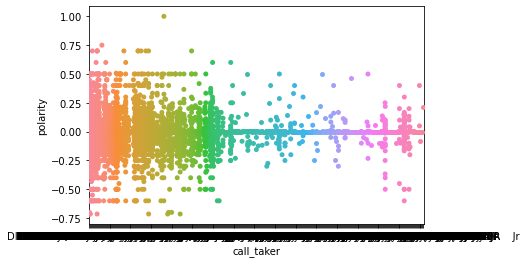

In [32]:
# Plot polarity 
ax = sns.stripplot(x="call_taker", y="polarity", data=call_df)

Definitely need fuzzy string matching to make these visualizations

Conclusion from sentiment analysis: Most narratives aren't very subjective and aren't very polarized, and there aren't meaningful differences overall across officers. Could potentially be interesting to drill down to individual incidents that have high polarity or subjectivity, but going to table for now.

## Williams College
Here, I'm going to use simple keyword matching with spaCy's [Matcher](https://spacy.io/api/matcher) to look for calls relating to Williams College. The keywords are:
* Williams
* college
* student
* university
* campus

In [34]:
from spacy.matcher import Matcher

In [35]:
# Initialize Matcher object and add patterns for keywords
matcher = Matcher(nlp.vocab)

patterns = [
    [{"LOWER":"williams"}],
    [{"LOWER":"college"}],
    [{"LOWER":"student"}],
    [{"LOWER":"university"}],
    [{"LOWER":"campus"}]
]

matcher.add("Williams", patterns)

In [42]:
# Look for matches in calls 
williams_calls = []
for call in call_dicts:
    if "Narrative" in call.keys():
        matches = matcher(nlp(call["Narrative"]))
        if len(matches) > 0:
            williams_calls.append(call)

In [43]:
len(williams_calls)

208

In [44]:
williams_calls

[{'callNumber': '19-22',
  'callTime': '1527',
  'callReason': '911 MOTOR VEHICLE ACCIDENT',
  'callAction': 'BUILDING CHECKED/SECURED',
  'Call Taker': 'PATROL KALVIN  DZIEDZIAK',
  'Location/Address': 'NORTH ST',
  'Units': [('32',
    {'Disp': '15:27:00', 'Arvd': '15:29:20', 'Clrd': '15:44:26'}),
   ('38', {'Disp': '15:27:00', 'Arvd': '15:29:18', 'Clrd': '15:46:09'})],
  'VIN': 'JS2YB5A38B6301415',
  'Reg': 'PC MA  66BS20',
  'Vehicle': 'RED 2011   SUZI   SX4',
  'Operator': 'LEBLANC,  NATHAN L @ 253   NORTH ST - WILLIAMSTOWN,   MA  01267-2004',
  'Operator_Sex': 'M',
  'Operator_Race': 'w',
  'Refer To Citation': 'Tl400608',
  'Owner': 'LEBLANC,  NATHAN L  @ 253  NORTH ST  - WILLIAMSTOWN,   MA 01267-2004',
  'Owner_Sex': 'M',
  'Owner_Race': 'W',
  'Owner_VIN': '4S4BRBCCBC3239617',
  'Owner_Reg': 'PC  MA 452WB4',
  'Owner_Vehicle': 'GRY 2012   SUBA ST  OUTBAC',
  'Narrative': 'MVA located at the rotary. 1535- Williams Inn asked to hold peter pan bus for three additional passengers.

Most of these are Williams College related, a few are about college students off campus in the town, a few aren't related, but by eye it look slike most of them are Williams College or Williams Inn related; going to strike the ones with Williams Inn since it's a hotel.

In [49]:
import jsonlines

In [50]:
with jsonlines.open('../generated_data/williams_college_calls.txt', 'w') as writer:
    writer.write(williams_calls)

In [45]:
final_williams_calls = []
for call in williams_calls:
    if 'Williams Inn' not in call['Narrative']:
        final_williams_calls.append(call)

In [46]:
len(final_williams_calls)

185

In [ ]:
williams_security = []
for call in final_williams_calls

#### Visualization
Plot of Williams calls over the course of the year